
**Exploring Accessibility for Disabled People in the City of Melbourne**

**Authored by**: Liny Jose Alias

**Duration**: 90 mins

**Level**: Intermediate

**Pre-requisite Skills**: Python, Data Visualization, Data Wrangling, Machine Learning Models,Deep Learning

**Scenario**
As a healthcare worker, I would like to know the nearest public toilets with facilities and accessibility for my disabled patients.

As a healthcare worker, i would like to know the areas friendly for visually impaired people.

***Project Objective, Overview & Research***

This use case aims to evaluate the accessibility of urban infrastructure for disabled individuals in the City of Melbourne. By analyzing datasets that include tactile ground surface indicators (TGSI), public toilets, and train station accessibility information, the City of Melbourne can identify areas where accessibility improvements are needed. The goal is to enhance the inclusiveness and navigability of the city for people with disabilities.

Dataset 1:
https://data.melbourne.vic.gov.au/explore/dataset/tactile-ground-surface-indicator/information/
This dataset contains tactile ground surface indicators(TGSI) that are located within the central business district of the City of Melbourne.
TGSI are used to help vision impaired people navigate the urban environment to avoid hazards.

Dataset 2:
https://data.melbourne.vic.gov.au/explore/dataset/public-toilets/information/
Public toilets known about or operated by the council. 

Dataset 3:
https://data.melbourne.vic.gov.au/explore/dataset/metro-train-stations-with-accessibility-information/information/
This data contains locations of train stations and their accessibility information, such as hearing aid information.


In [3]:
#Importing core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder

Loading the datasets through API

In [5]:
import requests
import pandas as pd
from io import StringIO

# Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        # Try to determine the delimiter by reading the first few lines
        delimiter = ','
        sample_lines = url_content.split('\n')[:5]
        for line in sample_lines:
            if ';' in line:
                delimiter = ';'
                break
        df = pd.read_csv(StringIO(url_content), delimiter=delimiter)
        print(f'Successfully retrieved dataset: {dataset_id}')
        return df
    else:
        print(f'Request failed with status code {response.status_code}')
        return None

# Dataset IDs
dataset_ids = {
    'tactile_indicator': 'tactile-ground-surface-indicator',
    'public_toilets': 'public-toilets',
    'train_station': 'metro-train-stations-with-accessibility-information'
    
}

# Retrieving and printing data for each dataset
datasets = {}
for name, dataset_id in dataset_ids.items():
    print(f"\nRetrieving data for {name}...")
    df = collect_data(dataset_id)
    if df is not None:
        datasets[name] = df
        print(f"The {name} dataset contains {len(df)} records.")
        print(df.head(5))
    else:
        print(f"Unable to retrieve the {name} dataset.")

# Creating dataframes
tgsi_df = datasets.get('tactile_indicator')
toilets_df = datasets.get('public_toilets')
stations_df = datasets.get('train_station')


Retrieving data for tactile_indicator...
Successfully retrieved dataset: tactile-ground-surface-indicator
The tactile_indicator dataset contains 357 records.
   asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
1       1506782   TGSI - William Street/ Little Bourke Street           NaN   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   

         lat         lon                                 location  
0 -37.820894  144.955183   -37.82089377224977, 144.95518315024808  
1 -37.814542  144.957883   -37.81454165692627, 144.95788286206448  
2 -37.816679  144.958800    -37.81667919572513, 144.9587999921556  
3 -37.816464  144.967126  -37.816463667054634, 144.96712585544967  
4 -37.816552  144.958728  

Viewing the datasets

In [7]:
#Displaying the first 5 rows of the dataframe
tgsi_df.head()

asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
1       1506782   TGSI - William Street/ Little Bourke Street           NaN   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   

         lat         lon                                 location  
0 -37.820894  144.955183   -37.82089377224977, 144.95518315024808  
1 -37.814542  144.957883   -37.81454165692627, 144.95788286206448  
2 -37.816679  144.958800    -37.81667919572513, 144.9587999921556  
3 -37.816464  144.967126  -37.816463667054634, 144.96712585544967  
4 -37.816552  144.958728   -37.81655161019709, 144.95872841830132

In [8]:
#Displaying the first 5 rows of the dataframe
toilets_df.head()

name female male wheelchair  \
0  Public Toilet - Queen Victoria Market (153 Vic...    yes  yes         no   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...     no  yes         no   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
3  Public Toilet - Toilet 142 - Queensberry Stree...     no  yes         no   
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...    yes  yes        yes   

            operator baby_facil        lat         lon  \
0  City of Melbourne         no -37.806121  144.956538   
1  City of Melbourne         no -37.819796  144.937665   
2  City of Melbourne         no -37.813838  144.963097   
3  City of Melbourne         no -37.804640  144.962850   
4  City of Melbourne         no -37.818924  144.934239   

                                  location  
0  -37.806121499077804, 144.95653844268273  
1  -37.819795975740334, 144.93766540530564  
2   -37.81383779217631, 144.96309721024045  
3   -37.80463970714722, 144.96285021945613  
4   -37.818924455699296, 144.9342385117904

In [9]:
#Displaying the first 5 rows of the dataframe
stations_df.head()

geo_point_2d  \
0           -37.77839599999999, 145.031251   
1           -37.86724899999996, 144.830604   
2  -37.761897999999974, 144.96056099999998   
3           -37.82241099999999, 145.045617   
4   -37.73345899999998, 144.96274700000004   

                                           geo_shape he_loop lift        pids  \
0  {"coordinates": [145.031251, -37.7783959999999...      No   No  Dot Matrix   
1  {"coordinates": [144.830604, -37.8672489999999...      No   No         LCD   
2  {"coordinates": [144.96056099999998, -37.76189...      No   No          No   
3  {"coordinates": [145.045617, -37.8224109999999...      No   No          No   
4  {"coordinates": [144.96274700000004, -37.73345...      No   No          No   

      station  
0  Alphington  
1      Altona  
2      Anstey  
3      Auburn  
4      Batman

Removing unneccessary columns

In [11]:
tgsi_df = tgsi_df.drop(['location'], axis=1) # as we already have lat and lon in separate columns
toilets_df = toilets_df.drop(['operator', 'baby_facil'], axis=1)
stations_df = stations_df.drop(['geo_shape'], axis=1)

In [12]:
# Display the first few rows of each dataset to verify the changes
print("TGSI Dataset:")
print(tgsi_df.head())
print("\nPublic Toilets Dataset:")
print(toilets_df.head())
print("\nMetro Train Stations Dataset:")
print(stations_df.head())

TGSI Dataset:
   asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
1       1506782   TGSI - William Street/ Little Bourke Street           NaN   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   

         lat         lon  
0 -37.820894  144.955183  
1 -37.814542  144.957883  
2 -37.816679  144.958800  
3 -37.816464  144.967126  
4 -37.816552  144.958728  

Public Toilets Dataset:
                                                name female male wheelchair  \
0  Public Toilet - Queen Victoria Market (153 Vic...    yes  yes         no   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...     no  yes         no   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
3  Publi

Checking for Missing values

In [14]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",tgsi_df.isnull().sum())


Null values in individual columns
 asset_number          0
asset_description     0
road_segment         41
lat                   0
lon                   0
dtype: int64


In [15]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",toilets_df.isnull().sum())

Null values in individual columns
 name          0
female        1
male          1
wheelchair    1
lat           0
lon           0
location      0
dtype: int64


In [16]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",stations_df.isnull().sum())

Null values in individual columns
 geo_point_2d    0
he_loop         0
lift            0
pids            0
station         0
dtype: int64


Handling Missing values

In [18]:
# Drop rows with NaN values
tgsi_df_cleaned = tgsi_df.dropna() #as road_segment is not a continous variable, dropping the rows instead of filling it

# Print the number of null values after dropping
print("\nNull values after dropping:")
print(tgsi_df_cleaned.isnull().sum())

# Print the total number of rows after dropping
print(f"\nTotal number of rows after dropping: {len(tgsi_df_cleaned)}")

# Calculate and print the number and percentage of rows dropped
rows_dropped = len(tgsi_df) - len(tgsi_df_cleaned)
percentage_dropped = (rows_dropped / len(tgsi_df)) * 100

print(f"\nNumber of rows dropped: {rows_dropped}")
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

# Verify the changes
print("\nFirst few rows of the cleaned dataset:")
print(tgsi_df_cleaned.head())

#Reassigning the cleaned dataframe back to tgsi_df
tgsi_df = tgsi_df_cleaned


Null values after dropping:
asset_number         0
asset_description    0
road_segment         0
lat                  0
lon                  0
dtype: int64

Total number of rows after dropping: 316

Number of rows dropped: 41
Percentage of rows dropped: 11.48%

First few rows of the cleaned dataset:
   asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   
6       1506881            TGSI - Bourke Street/ Queen Street       20085.0   

         lat         lon  
0 -37.820894  144.955183  
2 -37.816679  144.958800  
3 -37.816464  144.967126  
4 -37.816552  144.958728  
6 -37.814815  144.960767  


In [19]:
# Drop rows with NaN values
toilets_df_cleaned = toilets_df.dropna()

# Print the number of null values after dropping
print("\nNull values after dropping:")
print(toilets_df_cleaned.isnull().sum())

# Print the total number of rows after dropping
print(f"\nTotal number of rows after dropping: {len(toilets_df_cleaned)}")

# Calculate and print the number and percentage of rows dropped
rows_dropped = len(toilets_df) - len(toilets_df_cleaned)
percentage_dropped = (rows_dropped / len(toilets_df)) * 100

print(f"\nNumber of rows dropped: {rows_dropped}")
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

# Verify the changes
print("\nFirst few rows of the cleaned dataset:")
print(toilets_df_cleaned.head())

#Reassigning the cleaned dataframe back to toilets_df
toilets_df = toilets_df_cleaned


Null values after dropping:
name          0
female        0
male          0
wheelchair    0
lat           0
lon           0
location      0
dtype: int64

Total number of rows after dropping: 73

Number of rows dropped: 1
Percentage of rows dropped: 1.35%

First few rows of the cleaned dataset:
                                                name female male wheelchair  \
0  Public Toilet - Queen Victoria Market (153 Vic...    yes  yes         no   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...     no  yes         no   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
3  Public Toilet - Toilet 142 - Queensberry Stree...     no  yes         no   
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...    yes  yes        yes   

         lat         lon                                 location  
0 -37.806121  144.956538  -37.806121499077804, 144.95653844268273  
1 -37.819796  144.937665  -37.819795975740334, 144.93766540530564  
2 -37.813838  144.963097 

In [20]:
#Displaying the first 5 rows of the dataframe
tgsi_df.head()

asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   
6       1506881            TGSI - Bourke Street/ Queen Street       20085.0   

         lat         lon  
0 -37.820894  144.955183  
2 -37.816679  144.958800  
3 -37.816464  144.967126  
4 -37.816552  144.958728  
6 -37.814815  144.960767

In [21]:
toilets_df.head()

name female male wheelchair  \
0  Public Toilet - Queen Victoria Market (153 Vic...    yes  yes         no   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...     no  yes         no   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
3  Public Toilet - Toilet 142 - Queensberry Stree...     no  yes         no   
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...    yes  yes        yes   

         lat         lon                                 location  
0 -37.806121  144.956538  -37.806121499077804, 144.95653844268273  
1 -37.819796  144.937665  -37.819795975740334, 144.93766540530564  
2 -37.813838  144.963097   -37.81383779217631, 144.96309721024045  
3 -37.804640  144.962850   -37.80463970714722, 144.96285021945613  
4 -37.818924  144.934239   -37.818924455699296, 144.9342385117904

In [22]:
stations_df.head()

geo_point_2d he_loop lift        pids  \
0           -37.77839599999999, 145.031251      No   No  Dot Matrix   
1           -37.86724899999996, 144.830604      No   No         LCD   
2  -37.761897999999974, 144.96056099999998      No   No          No   
3           -37.82241099999999, 145.045617      No   No          No   
4   -37.73345899999998, 144.96274700000004      No   No          No   

      station  
0  Alphington  
1      Altona  
2      Anstey  
3      Auburn  
4      Batman

Converting the categorical columns in the Public toilet dataset to numerical variables using LabelEncoder

In [24]:
# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['female', 'male', 'wheelchair']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    toilets_df[column] = le.fit_transform(toilets_df[column])

# Display the first few rows to verify the change
print(toilets_df[['name', 'female', 'male', 'wheelchair']].head())

# If you want to see the mapping
print("\nEncoding mapping:")
for column in columns_to_encode:
    print(f"{column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

                                                name  female  male  wheelchair
0  Public Toilet - Queen Victoria Market (153 Vic...       2     2           1
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...       1     2           1
2  Public Toilet - Toilet 6 - Elizabeth Street (T...       2     1           1
3  Public Toilet - Toilet 142 - Queensberry Stree...       1     2           1
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...       2     2           2

Encoding mapping:
female: {'U': 0, 'no': 1, 'yes': 2}
male: {'U': 0, 'no': 1, 'yes': 2}
wheelchair: {'U': 0, 'no': 1, 'yes': 2}


In [25]:
toilets_df.head()

name  female  male  \
0  Public Toilet - Queen Victoria Market (153 Vic...       2     2   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...       1     2   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...       2     1   
3  Public Toilet - Toilet 142 - Queensberry Stree...       1     2   
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...       2     2   

   wheelchair        lat         lon                                 location  
0           1 -37.806121  144.956538  -37.806121499077804, 144.95653844268273  
1           1 -37.819796  144.937665  -37.819795975740334, 144.93766540530564  
2           1 -37.813838  144.963097   -37.81383779217631, 144.96309721024045  
3           1 -37.804640  144.962850   -37.80463970714722, 144.96285021945613  
4           2 -37.818924  144.934239   -37.818924455699296, 144.9342385117904

**Exploratory Data Analysis**

Analyzing the patterns in Tactile Ground Surface Indicator Distribution

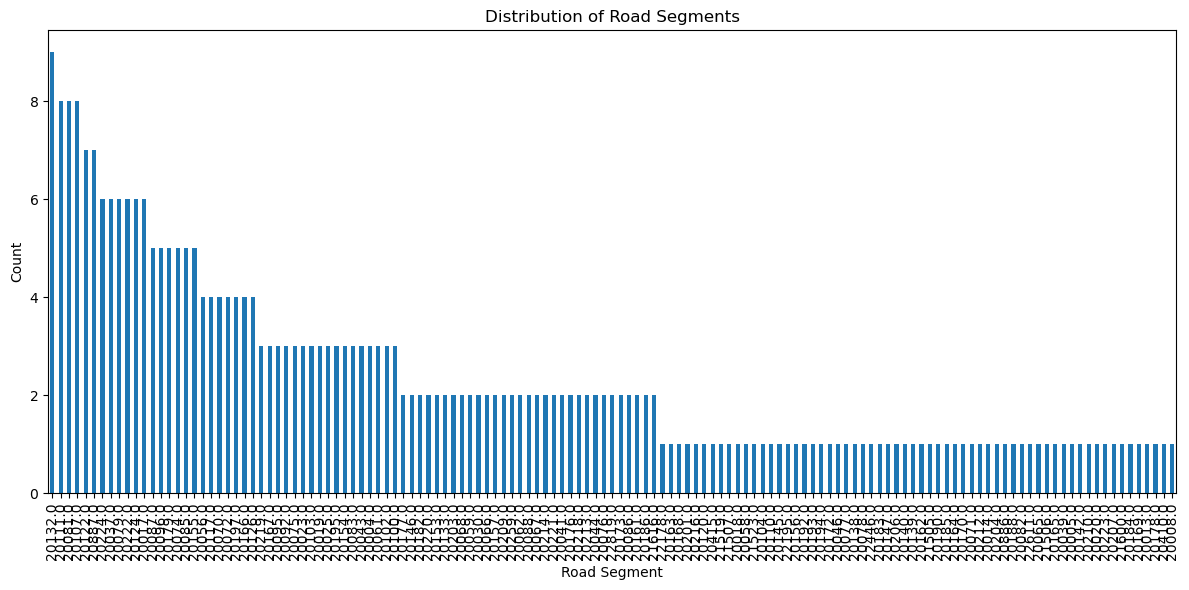

In [28]:
# Distribution of road segments
plt.figure(figsize=(12, 6))
tgsi_df['road_segment'].value_counts().plot(kind='bar')
plt.title('Distribution of Road Segments')
plt.xlabel('Road Segment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

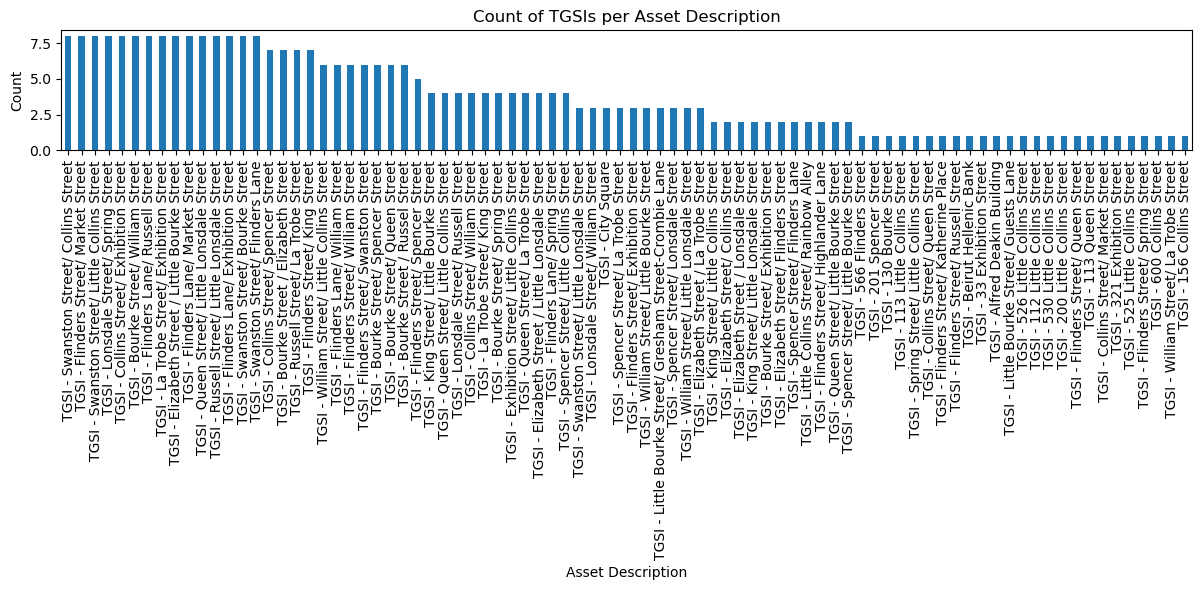

In [29]:
# Count of TGSIs per asset description
plt.figure(figsize=(12, 6))
tgsi_df['asset_description'].value_counts().plot(kind='bar')
plt.title('Count of TGSIs per Asset Description')
plt.xlabel('Asset Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
# Scatter plot of lat vs lon
plt.figure(figsize=(10, 8))
plt.scatter(tgsi_df['lon'], tgsi_df['lat'])
plt.title('Geographic Distribution of TGSIs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

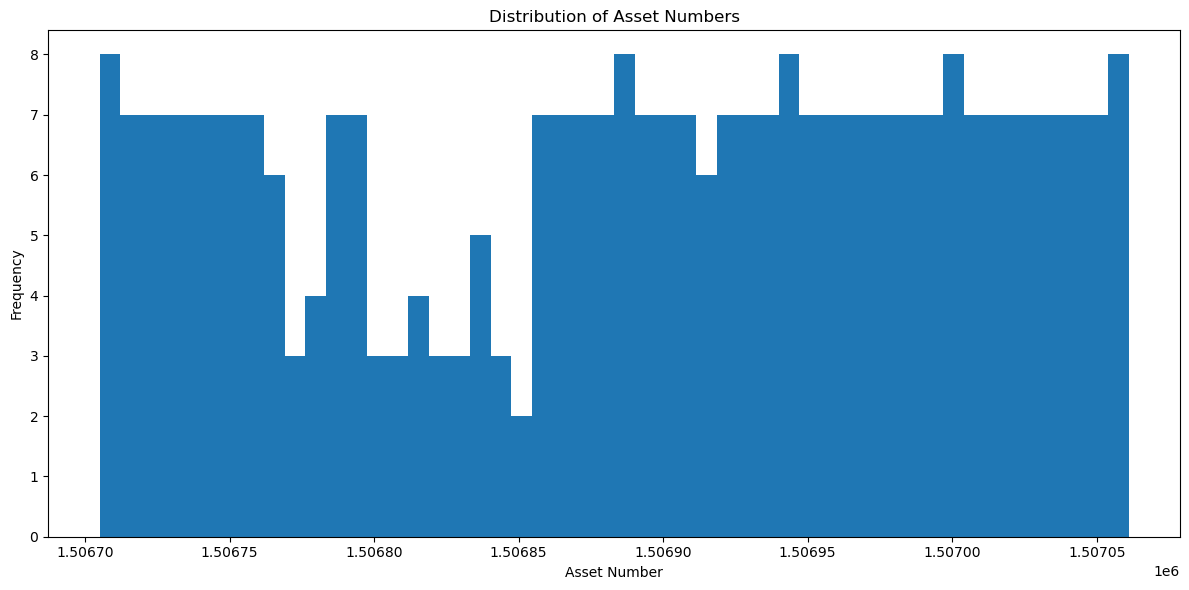

In [31]:
# Additional analysis: Checking for any patterns in asset numbers
tgsi_df['asset_number'] = pd.to_numeric(tgsi_df['asset_number'])
plt.figure(figsize=(12, 6))
plt.hist(tgsi_df['asset_number'], bins=50)
plt.title('Distribution of Asset Numbers')
plt.xlabel('Asset Number')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Group by road segment or coordinates (lat, lon) and count occurrences of TGSIs
location_counts = tgsi_df.groupby(['road_segment', 'lat', 'lon']).size().reset_index(name='tgsi_count')

# Sort by the least amount of TGSIs
locations_needing_improvement = location_counts.sort_values(by='tgsi_count', ascending=True)

# Select top 10 locations with the least TGSIs
top_10_locations = locations_needing_improvement.head(10)

# Display the top 10 locations
print(top_10_locations)


     road_segment        lat         lon  tgsi_count
0         20004.0 -37.810998  144.967115           1
214       20166.0 -37.813282  144.962838           1
213       20166.0 -37.813354  144.962620           1
212       20166.0 -37.814052  144.963247           1
211       20166.0 -37.814152  144.962995           1
210       20165.0 -37.814349  144.963326           1
209       20164.0 -37.816105  144.963824           1
208       20163.0 -37.816413  144.963978           1
207       20162.0 -37.818061  144.964732           1
206       20161.0 -37.810504  144.964342           1


In [33]:
# Merge the top 10 locations with the original dataframe to get the names/descriptions
locations_with_names = pd.merge(top_10_locations, tgsi_df[['road_segment', 'asset_description']], on='road_segment', how='left')

# Drop duplicates if there are any
locations_with_names = locations_with_names.drop_duplicates(subset=['road_segment', 'lat', 'lon'])

# Display the final dataframe with the location names/descriptions
print(locations_with_names[['asset_description', 'lat', 'lon', 'tgsi_count']])


                                 asset_description        lat         lon  \
0           TGSI - Lonsdale Street/ Russell Street -37.810998  144.967115   
3          TGSI - Bourke Street / Elizabeth Street -37.813282  144.962838   
7          TGSI - Bourke Street / Elizabeth Street -37.813354  144.962620   
11         TGSI - Bourke Street / Elizabeth Street -37.814052  144.963247   
15         TGSI - Bourke Street / Elizabeth Street -37.814152  144.962995   
19         TGSI - Bourke Street / Elizabeth Street -37.814349  144.963326   
20         TGSI - Elizabeth Street/ Collins Street -37.816105  144.963824   
21         TGSI - Elizabeth Street/ Collins Street -37.816413  144.963978   
22        TGSI - Elizabeth Street/ Flinders Street -37.818061  144.964732   
23  TGSI - Swanston Street/ Little Lonsdale Street -37.810504  144.964342   

    tgsi_count  
0            1  
3            1  
7            1  
11           1  
15           1  
19           1  
20           1  
21           1  

Analyzing accessibility in the public toilets.

In [35]:
# Basic information about the dataset
print(toilets_df.info())
print("\nSummary statistics:")
print(toilets_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 73
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        73 non-null     object 
 1   female      73 non-null     int64  
 2   male        73 non-null     int64  
 3   wheelchair  73 non-null     int64  
 4   lat         73 non-null     float64
 5   lon         73 non-null     float64
 6   location    73 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 4.6+ KB
None

Summary statistics:
          female       male  wheelchair        lat         lon
count  73.000000  73.000000   73.000000  73.000000   73.000000
mean    1.821918   1.917808    1.643836 -37.810780  144.961775
std     0.419738   0.322896    0.510171   0.014282    0.014911
min     0.000000   0.000000    0.000000 -37.845207  144.921106
25%     2.000000   2.000000    1.000000 -37.819406  144.955578
50%     2.000000   2.000000    2.000000 -37.812241  144.962923


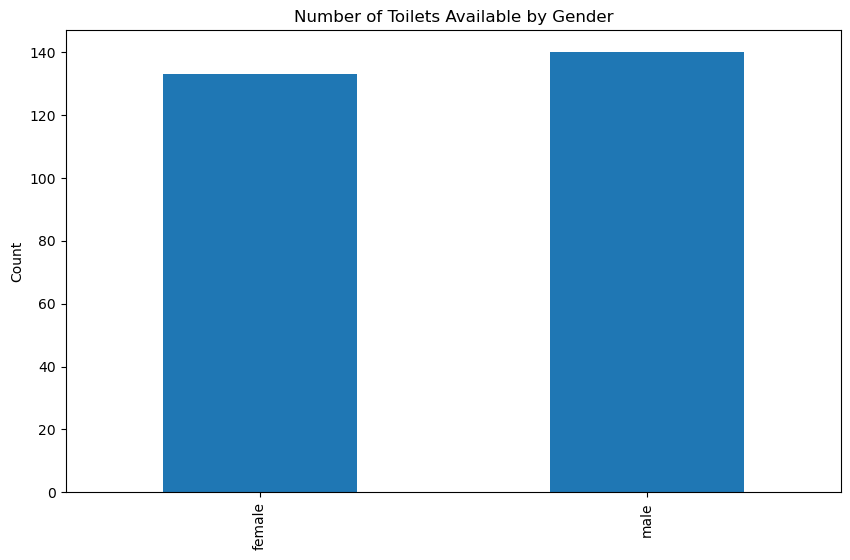

In [36]:
# Count of toilets by gender availability
gender_counts = toilets_df[['female', 'male']].sum()
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')
plt.title('Number of Toilets Available by Gender')
plt.ylabel('Count')
plt.show()

In [37]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(toilets_df[['female', 'male', 'wheelchair']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Toilet Accessibility')
plt.show()

In [38]:
# Wheelchair accessibility
wheelchair_count = toilets_df['wheelchair'].value_counts()
plt.figure(figsize=(8, 6))
wheelchair_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Wheelchair Accessibility')
plt.ylabel('')
plt.show()

In [39]:
# Toilets with all facilities
all_facilities = toilets_df[(toilets_df['female'] == 2) & 
                            (toilets_df['male'] == 2) & 
                            (toilets_df['wheelchair'] == 2)]
print(f"\nNumber of toilets with all facilities: {len(all_facilities)}")


Number of toilets with all facilities: 48


In [40]:
# Top 5 locations with most facilities
print("\nTop 5 locations with most facilities:")
print(toilets_df[['name', 'female', 'male', 'wheelchair']].sort_values(
    by=['female', 'male', 'wheelchair'], ascending=False).head())


Top 5 locations with most facilities:
                                                 name  female  male  \
4   Public Toilet - Victoria Harbour, Shed 2 (Nort...       2     2   
7   Public Toilet - Toilet 181 - Point Park (Point...       2     2   
8   Public Toilet - Toilet 118 - Fitzroy Gardens (...       2     2   
9   Public Toilet - Toilet 34 - Franklin Street (O...       2     2   
11  Public Toilet - Toilet 131 - Royal Park (Flemi...       2     2   

    wheelchair  
4            2  
7            2  
8            2  
9            2  
11           2  


In [41]:
# Location distribution
plt.figure(figsize=(12, 8))
plt.scatter(toilets_df['lon'], toilets_df['lat'])
plt.title('Geographical Distribution of Public Toilets')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Finding out the locations which needs improvement the most. Now let's create a facility score for each location.

In [43]:
# Calculate a 'facility_score' for each location
toilets_df['facility_score'] = toilets_df['female'] + toilets_df['male'] + toilets_df['wheelchair']

# Sort the DataFrame by facility_score in ascending order and select the top 5
needs_improvement = toilets_df.sort_values('facility_score').head(5)

# Display the results
print("5 locations with least facilities:")
print(needs_improvement[['name', 'female', 'male', 'wheelchair', 'facility_score']])

5 locations with least facilities:
                                                 name  female  male  \
62   Public Toilet - Ron Barassi Senior Park Pavilion       0     0   
37  Public Toilet - Toilet 102 - Fawkner Park, Nor...       2     1   
34  Public Toilet - Toilet 146 - Swanston Street (...       2     1   
13  Public Toilet - Toilet 170 - Queensberry Stree...       1     2   
44  Public Toilet - Toilet 125 - Gordon Reserve (7...       2     1   

    wheelchair  facility_score  
62           0               0  
37           1               4  
34           1               4  
13           1               4  
44           1               4  


In [44]:
!pip install folium

In [45]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Create the dataframe
toilets_df = pd.DataFrame({
    'name': [
        'Public Toilet - Toilet 140 - Queensberry Street (Cnr Capel Street)',
        'Public Toilet - Toilet 6 - Elizabeth Street (Toilet 6)',
        'Public Toilet - Toilet 142 - Queensberry Street (Errol Street)',
        'Public Toilet - Royal Park Brens Pavilion',
        'Public Toilet - Toilet 177 - Bellair Street (Opposite Courthouse)'
    ],
    'female': [1, 2, 1, 2, 2],
    'male': [2, 1, 2, 2, 2],
    'wheelchair': [1, 1, 1, 1, 2],
    'lat': [-37.803995, -37.813838, -37.804640, -37.786221, -37.793732],
    'lon': [144.959091, 144.963097, 144.962850, 144.955001, 144.930352]
})

# Calculate facility score
toilets_df['facility_score'] = toilets_df['female'] + toilets_df['male'] + toilets_df['wheelchair']

# Create a map centered on the mean coordinates of the locations
center_lat = toilets_df['lat'].mean()
center_lon = toilets_df['lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each location
for idx, row in toilets_df.iterrows():
    # Create popup content
    popup_content = f"""
    <b>{row['name']}</b><br>
    Female: {row['female']}<br>
    Male: {row['male']}<br>
    Wheelchair: {row['wheelchair']}<br>
    Facility Score: {row['facility_score']}
    """
    
    # Create marker
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=folium.Popup(popup_content, max_width=300),
        tooltip=row['name']
    ).add_to(marker_cluster)

# Display the map in the notebook
display(m)

This is an interactive map displaying the locations for public toilets with least facilities in the city of Melbourne

Analyzing the patterns in Metro train stations dataset

In [48]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to 'he_loop', 'pids', and 'lift' columns
for col in ['he_loop', 'lift', 'pids']:
    stations_df[f'{col}_encoded'] = le.fit_transform(stations_df[col])

# Print the first few rows of the dataframe to see the encoded columns
print("First few rows with encoded columns:")
print(stations_df[['he_loop', 'he_loop_encoded', 
                   'lift', 'lift_encoded', 
                   'pids', 'pids_encoded']].head())

# Print encoding mappings for each column
for col in ['he_loop', 'lift', 'pids']:
    print(f"\nEncoding for {col}:")
    for category, code in zip(le.classes_, le.transform(le.classes_)):
        print(f"{category}: {code}")

First few rows with encoded columns:
  he_loop  he_loop_encoded lift  lift_encoded        pids  pids_encoded
0      No                0   No             0  Dot Matrix             1
1      No                0   No             0         LCD             2
2      No                0   No             0          No             3
3      No                0   No             0          No             3
4      No                0   No             0          No             3

Encoding for he_loop:
CRT: 0
Dot Matrix: 1
LCD: 2
No: 3

Encoding for lift:
CRT: 0
Dot Matrix: 1
LCD: 2
No: 3

Encoding for pids:
CRT: 0
Dot Matrix: 1
LCD: 2
No: 3


In [49]:
stations_df.head()

geo_point_2d he_loop lift        pids  \
0           -37.77839599999999, 145.031251      No   No  Dot Matrix   
1           -37.86724899999996, 144.830604      No   No         LCD   
2  -37.761897999999974, 144.96056099999998      No   No          No   
3           -37.82241099999999, 145.045617      No   No          No   
4   -37.73345899999998, 144.96274700000004      No   No          No   

      station  he_loop_encoded  lift_encoded  pids_encoded  
0  Alphington                0             0             1  
1      Altona                0             0             2  
2      Anstey                0             0             3  
3      Auburn                0             0             3  
4      Batman                0             0             3

In [50]:
# Basic information about the dataset
print("Dataset Information:")
print(stations_df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geo_point_2d     219 non-null    object
 1   he_loop          219 non-null    object
 2   lift             219 non-null    object
 3   pids             219 non-null    object
 4   station          219 non-null    object
 5   he_loop_encoded  219 non-null    int64 
 6   lift_encoded     219 non-null    int64 
 7   pids_encoded     219 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 13.8+ KB
None


In [51]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(stations_df.describe())


Summary Statistics:
       he_loop_encoded  lift_encoded  pids_encoded
count       219.000000    219.000000    219.000000
mean          0.260274      0.155251      1.812785
std           0.671040      0.362974      0.926976
min           0.000000      0.000000      0.000000
25%           0.000000      0.000000      1.000000
50%           0.000000      0.000000      1.000000
75%           0.000000      0.000000      3.000000
max           2.000000      1.000000      3.000000


In [52]:
# Split geo_point_2d into latitude and longitude if not already done
if 'latitude' not in stations_df.columns:
    stations_df[['latitude', 'longitude']] = stations_df['geo_point_2d'].str.split(',', expand=True).astype(float)

In [53]:
# Distribution of accessibility features
plt.figure(figsize=(10, 6))
stations_df[['he_loop_encoded', 'lift_encoded', 'pids_encoded']].sum().plot(kind='bar')
plt.title('Distribution of Accessibility Features')
plt.xlabel('Feature')
plt.ylabel('Count of Stations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


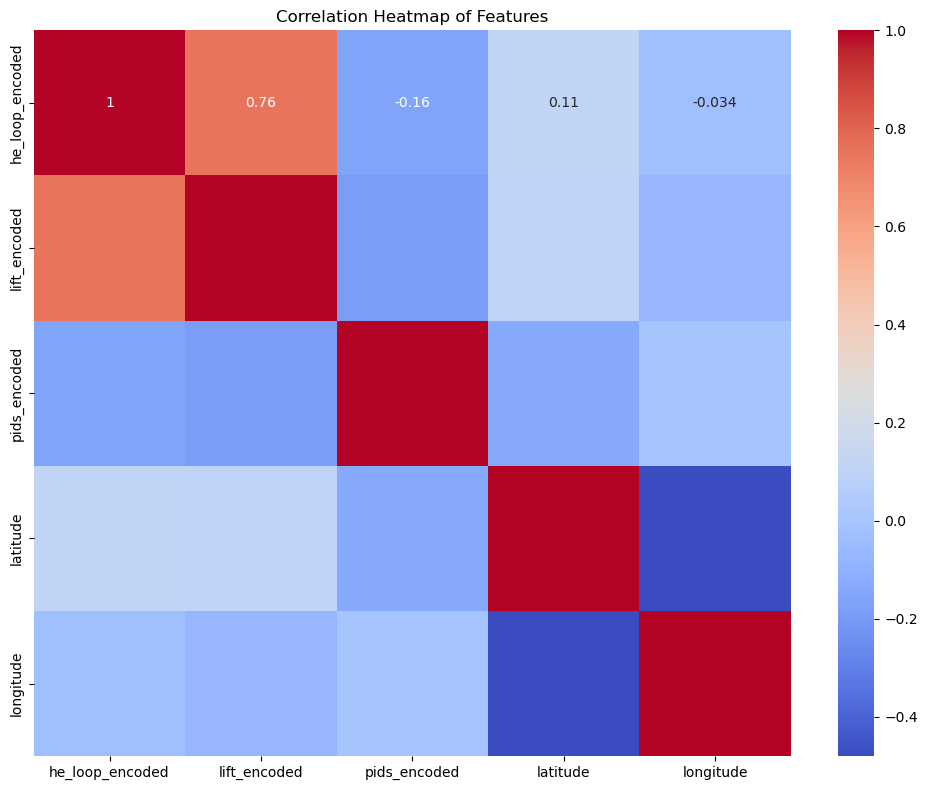

In [54]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stations_df[['he_loop_encoded', 'lift_encoded', 'pids_encoded', 'latitude', 'longitude']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

In [55]:
# Geographic distribution of stations
plt.figure(figsize=(12, 10))
plt.scatter(stations_df['longitude'], stations_df['latitude'], 
            c=stations_df[['he_loop_encoded', 'lift_encoded', 'pids_encoded']].sum(axis=1), 
            cmap='viridis')
plt.colorbar(label='Number of Accessibility Features')
plt.title('Geographic Distribution of Stations with Accessibility Features')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [56]:
# Top 10 stations by accessibility features
stations_df['total_features'] = stations_df[['he_loop_encoded', 'lift_encoded', 'pids_encoded']].sum(axis=1)
print("\nTop 10 stations by number of accessibility features:")
print(stations_df.sort_values('total_features', ascending=False)[['station', 'total_features']].head(10))



Top 10 stations by number of accessibility features:
               station  total_features
218          Southland               5
40            Mckinnon               5
128          St Albans               5
167           Gardiner               5
134         Parliament               5
114  Melbourne Central               5
104        Heatherdale               5
165          Flagstaff               5
98             Ginifer               5
79           Bentleigh               5


In [57]:
# Distribution of total features
plt.figure(figsize=(10, 6))
stations_df['total_features'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Total Accessibility Features per Station')
plt.xlabel('Number of Features')
plt.ylabel('Count of Stations')
plt.tight_layout()
plt.show()

In [58]:
# Pairplot of numerical features
sns.pairplot(stations_df[['he_loop_encoded', 'lift_encoded', 'pids_encoded', 'latitude', 'longitude']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

In [59]:
# Additional statistics
print("\nPercentage of stations with each feature:")
for col in ['he_loop_encoded', 'lift_encoded', 'pids_encoded']:
    percentage = (stations_df[col] == 1).mean() * 100
    print(f"{col}: {percentage:.2f}%")

print("\nAverage number of accessibility features per station:", stations_df['total_features'].mean())


Percentage of stations with each feature:
he_loop_encoded: 0.46%
lift_encoded: 15.53%
pids_encoded: 52.51%

Average number of accessibility features per station: 2.228310502283105


5 Worst Stations Requiring Improvement:
                  station he_loop lift        pids  facility_score
0              Alphington      No   No  Dot Matrix               1
137                Regent      No   No  Dot Matrix               1
136             Patterson      No   No  Dot Matrix               1
132  Upper Ferntree Gully      No   No  Dot Matrix               1
130             Thornbury      No   No  Dot Matrix               1


<Figure size 1200x600 with 0 Axes>

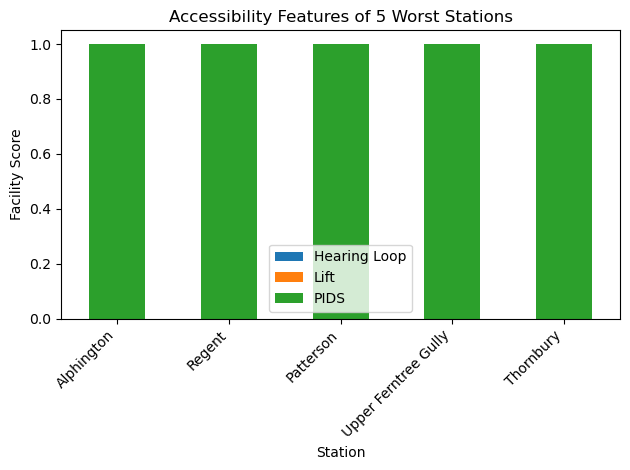


Overall Statistics:
Average Facility Score: 2.23
Median Facility Score: 2.00
Stations with Zero Facilities: 0



Percentage of Stations with Each Facility Score:
1    42.922374
2     8.219178
3    37.442922
4     5.936073
5     5.479452
Name: facility_score, dtype: float64

Suggestions for Improvement:

Alphington:
- Install hearing loop
- Install lift

Regent:
- Install hearing loop
- Install lift

Patterson:
- Install hearing loop
- Install lift

Upper Ferntree Gully:
- Install hearing loop
- Install lift

Thornbury:
- Install hearing loop
- Install lift


In [60]:
# Calculate facility score
stations_df['facility_score'] = stations_df['he_loop_encoded'] + stations_df['lift_encoded'] + stations_df['pids_encoded']

# Sort stations by facility score in ascending order
worst_stations = stations_df.sort_values('facility_score').head()

# Display the 5 worst stations
print("5 Worst Stations Requiring Improvement:")
print(worst_stations[['station', 'he_loop', 'lift', 'pids', 'facility_score']])

# Visualize the worst stations
plt.figure(figsize=(12, 6))
worst_stations.set_index('station')[['he_loop_encoded', 'lift_encoded', 'pids_encoded']].plot(kind='bar', stacked=True)
plt.title('Accessibility Features of 5 Worst Stations')
plt.xlabel('Station')
plt.ylabel('Facility Score')
plt.legend(['Hearing Loop', 'Lift', 'PIDS'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional analysis
print("\nOverall Statistics:")
print(f"Average Facility Score: {stations_df['facility_score'].mean():.2f}")
print(f"Median Facility Score: {stations_df['facility_score'].median():.2f}")
print(f"Stations with Zero Facilities: {(stations_df['facility_score'] == 0).sum()}")

# Distribution of facility scores
plt.figure(figsize=(10, 6))
stations_df['facility_score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Facility Scores')
plt.xlabel('Facility Score')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()

# Percentage of stations with each score
print("\nPercentage of Stations with Each Facility Score:")
score_percentages = stations_df['facility_score'].value_counts(normalize=True) * 100
print(score_percentages.sort_index())

# Suggestions for improvement
print("\nSuggestions for Improvement:")
for _, station in worst_stations.iterrows():
    print(f"\n{station['station']}:")
    if station['he_loop_encoded'] == 0:
        print("- Install hearing loop")
    if station['lift_encoded'] == 0:
        print("- Install lift")
    if station['pids_encoded'] == 0:
        print("- Install Passenger Information Display System (PIDS)")

Build a predictive ML model for accessibility scores in the City of Melbourne

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get correct column names
def get_lat_lon_columns(df):
    lat_options = ['lat', 'latitude']
    lon_options = ['lon', 'long', 'longitude']
    
    lat_col = next((col for col in lat_options if col in df.columns), None)
    lon_col = next((col for col in lon_options if col in df.columns), None)
    
    if lat_col is None or lon_col is None:
        raise ValueError(f"Couldn't find latitude/longitude columns in dataframe. Columns: {df.columns}")
    
    return lat_col, lon_col

# Get correct column names for each dataframe
tgsi_lat, tgsi_lon = get_lat_lon_columns(tgsi_df)
toilets_lat, toilets_lon = get_lat_lon_columns(toilets_df)
stations_lat, stations_lon = get_lat_lon_columns(stations_df)

def distance_to_nearest(df, lat, lon, lat_col, lon_col):
    return np.sqrt(((df[lat_col] - lat)**2 + (df[lon_col] - lon)**2)).min()

def count_features_in_radius(df, lat, lon, radius, lat_col, lon_col):
    return df[(df[lat_col] - lat)**2 + (df[lon_col] - lon)**2 < radius**2].shape[0]

# Create a grid of points across the city
lat_min, lat_max = min(stations_df[stations_lat].min(), toilets_df[toilets_lat].min(), tgsi_df[tgsi_lat].min()), \
                   max(stations_df[stations_lat].max(), toilets_df[toilets_lat].max(), tgsi_df[tgsi_lat].max())
lon_min, lon_max = min(stations_df[stations_lon].min(), toilets_df[toilets_lon].min(), tgsi_df[tgsi_lon].min()), \
                   max(stations_df[stations_lon].max(), toilets_df[toilets_lon].max(), tgsi_df[tgsi_lon].max())

grid_size = 100
lats = np.linspace(lat_min, lat_max, grid_size)
lons = np.linspace(lon_min, lon_max, grid_size)

grid_points = [(lat, lon) for lat in lats for lon in lons]

# Create features for each grid point
radius = 0.01  # Adjust based on city scale
features = []
for lat, lon in grid_points:
    tgsi_count = count_features_in_radius(tgsi_df, lat, lon, radius, tgsi_lat, tgsi_lon)
    toilet_count = count_features_in_radius(toilets_df, lat, lon, radius, toilets_lat, toilets_lon)
    station_count = count_features_in_radius(stations_df, lat, lon, radius, stations_lat, stations_lon)
    
    accessible_toilets = count_features_in_radius(toilets_df[toilets_df['wheelchair'] == 'yes'], lat, lon, radius, toilets_lat, toilets_lon)
    stations_with_lift = count_features_in_radius(stations_df[stations_df['lift_encoded'] == 1], lat, lon, radius, stations_lat, stations_lon)
    stations_with_hearing_loop = count_features_in_radius(stations_df[stations_df['he_loop_encoded'] == 1], lat, lon, radius, stations_lat, stations_lon)
    stations_with_pids = count_features_in_radius(stations_df[stations_df['pids_encoded'] == 1], lat, lon, radius, stations_lat, stations_lon)
    
    # New distance-based features
    nearest_tgsi = distance_to_nearest(tgsi_df, lat, lon, tgsi_lat, tgsi_lon)
    nearest_toilet = distance_to_nearest(toilets_df, lat, lon, toilets_lat, toilets_lon)
    nearest_station = distance_to_nearest(stations_df, lat, lon, stations_lat, stations_lon)
    
    # Density features
    area = np.pi * radius**2
    tgsi_density = tgsi_count / area
    toilet_density = toilet_count / area
    station_density = station_count / area
    
    features.append([lat, lon, tgsi_count, toilet_count, station_count, 
                     accessible_toilets, stations_with_lift, stations_with_hearing_loop, stations_with_pids,
                     nearest_tgsi, nearest_toilet, nearest_station,
                     tgsi_density, toilet_density, station_density])

columns = ['latitude', 'longitude', 'tgsi_count', 'toilet_count', 'station_count', 
           'accessible_toilets', 'stations_with_lift', 'stations_with_hearing_loop', 'stations_with_pids',
           'nearest_tgsi', 'nearest_toilet', 'nearest_station',
           'tgsi_density', 'toilet_density', 'station_density']
df = pd.DataFrame(features, columns=columns)


# Refined accessibility score calculation
weights = {
    'tgsi_count': 1,
    'accessible_toilets': 2,
    'stations_with_lift': 3,
    'stations_with_hearing_loop': 2,
    'stations_with_pids': 2,
    'tgsi_density': 1.5,
    'toilet_density': 1.5,
    'station_density': 1.5
}

df['accessibility_score'] = sum(df[feature] * weight for feature, weight in weights.items()) / \
                            (df['toilet_count'] + df['station_count'] + 1)

# Model Training
X = df.drop(['accessibility_score', 'latitude', 'longitude'], axis=1)
y = df['accessibility_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared Score: {r2}")
    print(f"  Cross-validation R-squared: {cv_scores.mean()} (+/- {cv_scores.std() * 2})")
    print()

# Use the best performing model for further analysis
best_model = models['Random Forest']  # Random Forest performs best

# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Visualize Predictions
df['predicted_score'] = best_model.predict(scaler.transform(X))




Linear Regression:
  Mean Squared Error: 7651878.075241257
  R-squared Score: 0.5779348904998888
  Cross-validation R-squared: 0.8859187892088978 (+/- 0.2394598069026308)

Random Forest:
  Mean Squared Error: 4030.424916038725
  R-squared Score: 0.9997776883378443
  Cross-validation R-squared: 0.8772009574926687 (+/- 0.26464037965234816)

Gradient Boosting:
  Mean Squared Error: 3301.151816161021
  R-squared Score: 0.9998179138521205
  Cross-validation R-squared: 0.8909703125086349 (+/- 0.26912217719837506)



In [63]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster, HeatMap
from IPython.display import display

# Function to create sample data 
def create_sample_data(n_samples):
    return pd.DataFrame({
        'latitude': np.random.uniform(-37.82, -37.78, n_samples),
        'longitude': np.random.uniform(144.93, 144.98, n_samples),
        'tgsi_count': np.random.randint(0, 10, n_samples),
        'toilet_count': np.random.randint(0, 5, n_samples),
        'station_count': np.random.randint(0, 3, n_samples),
        'accessible_toilets': np.random.randint(0, 3, n_samples),
        'stations_with_lift': np.random.randint(0, 2, n_samples),
        'stations_with_hearing_loop': np.random.randint(0, 2, n_samples),
        'stations_with_pids': np.random.randint(0, 2, n_samples),
        'nearest_tgsi': np.random.uniform(0, 0.01, n_samples),
        'nearest_toilet': np.random.uniform(0, 0.02, n_samples),
        'nearest_station': np.random.uniform(0, 0.03, n_samples),
        'tgsi_density': np.random.uniform(0, 100, n_samples),
        'toilet_density': np.random.uniform(0, 50, n_samples),
        'station_density': np.random.uniform(0, 30, n_samples),
    })

# Create sample data 
df = create_sample_data(1000)

# Calculate accessibility score (simplified version)
weights = {
    'tgsi_count': 1, 'accessible_toilets': 2, 'stations_with_lift': 3,
    'stations_with_hearing_loop': 2, 'stations_with_pids': 2,
    'tgsi_density': 1.5, 'toilet_density': 1.5, 'station_density': 1.5
}

df['accessibility_score'] = sum(df[feature] * weight for feature, weight in weights.items()) / \
                            (df['toilet_count'] + df['station_count'] + 1)

# Normalize the accessibility score
df['accessibility_score'] = (df['accessibility_score'] - df['accessibility_score'].min()) / \
                            (df['accessibility_score'].max() - df['accessibility_score'].min())

# Create the map
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Add heatmap layer for accessibility scores
heatmap_data = df[['latitude', 'longitude', 'accessibility_score']].values.tolist()
HeatMap(heatmap_data, radius=15, blur=10, max_zoom=1, overlay=True).add_to(m)

# Create MarkerClusters for different features
tgsi_cluster = MarkerCluster(name='TGSI').add_to(m)
toilet_cluster = MarkerCluster(name='Toilets').add_to(m)
station_cluster = MarkerCluster(name='Stations').add_to(m)

# Add markers for each feature type
for idx, row in df.iterrows():
    if row['tgsi_count'] > 0:
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"TGSI Count: {row['tgsi_count']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(tgsi_cluster)
    
    if row['toilet_count'] > 0:
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Toilet Count: {row['toilet_count']}<br>Accessible Toilets: {row['accessible_toilets']}",
            icon=folium.Icon(color='green', icon='toilet', prefix='fa')
        ).add_to(toilet_cluster)
    
    if row['station_count'] > 0:
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Station Count: {row['station_count']}<br>With Lift: {row['stations_with_lift']}<br>With Hearing Loop: {row['stations_with_hearing_loop']}<br>With PIDS: {row['stations_with_pids']}",
            icon=folium.Icon(color='red', icon='train', prefix='fa')
        ).add_to(station_cluster)

# Add layer control
folium.LayerControl().add_to(m)

# Add a legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 250px; height: 220px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">&nbsp; Accessibility Features <br>
     &nbsp; <i class="fa fa-info-sign fa-2x" style="color:blue"></i>&nbsp; TGSI <br>
     &nbsp; <i class="fa fa-toilet fa-2x" style="color:green"></i>&nbsp; Toilets <br>
     &nbsp; <i class="fa fa-train fa-2x" style="color:red"></i>&nbsp; Stations <br>
     &nbsp; Accessibility Score <br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:green"></i>&nbsp; High Accessibility <br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:yellow"></i>&nbsp; Medium Accessibility <br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:red"></i>&nbsp; Low Accessibility
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map in the notebook
display(m)

This interactive map displays locations of public toilets, metro train stations with high, medium and low accessibility.

### Conclusion Report: Exploring Accessibility for Disabled People in the City of Melbourne

## Executive Summary

This report presents the findings of a data-driven analysis aimed at assessing and improving accessibility features for disabled individuals in the City of Melbourne. By analyzing datasets that include tactile ground surface indicators (TGSI), public toilets, and metro train stations' accessibility information, we identified several areas where infrastructure improvements are needed. These enhancements will make the city more inclusive and navigable for individuals with disabilities, particularly those who are visually impaired or physically disabled.

### Key Insights:

**Tactile Ground Surface Indicators (TGSI):**
The analysis revealed 10 high-priority locations that require improvements in TGSI infrastructure to support the visually impaired. All these locations had only one TGSI feature, suggesting a lack of comprehensive support for vision-impaired navigation. The most critical areas include intersections on Lonsdale Street, Bourke Street, Elizabeth Street, and Flinders Street, where increased TGSI coverage would improve safety and mobility.

**Public Toilets:**
The availability of wheelchair-accessible toilets was another key focus. The data analysis highlighted 5 top-performing public toilet locations with the most comprehensive facilities, ensuring accessibility for both male, female, and wheelchair users. However, 5 locations were found to have inadequate facilities, with minimal to no wheelchair accessibility, particularly in Ron Barassi Senior Park Pavilion and Fawkner Park.

**Metro Train Stations:**
Train station accessibility features were also assessed, focusing on key components such as hearing loops, lifts, and real-time passenger information display systems (PIDS). The analysis identified the top 10 stations with the most comprehensive accessibility features, ensuring a fully accessible transit experience for disabled commuters. Conversely, 5 stations were flagged as having poor accessibility, with no hearing loops, lifts, and outdated dot matrix PIDS. Immediate improvements are recommended for stations such as Alphington, Regent, and Patterson to ensure all passengers, regardless of disability, can comfortably use the city's train network.

### Execution Modality

In addition to the exploratory analysis, a predictive machine learning (ML) model was developed to forecast accessibility scores across various areas in the City of Melbourne. This model was trained on features such as TGSI coverage, public toilet accessibility, and train station facilities. The model allowed for a data-driven approach in identifying areas most in need of improvement.

Furthermore, facility scores were calculated for public toilets and train stations based on the availability of accessibility features such as wheelchair access, hearing loops, and lifts. These scores provided a quantifiable measure to prioritize locations for infrastructure upgrades, enabling a more efficient allocation of resources to enhance urban accessibility.

An interactive map highlighting locations with high, medium and low accessibility features.

### Findings:

#### **Top 10 Locations Requiring TGSI Improvements:**
The following locations were identified as requiring urgent upgrades in tactile ground surface indicators (TGSI) for visually impaired individuals. All locations had only one TGSI feature, indicating a need for improvement:
1. **Lonsdale Street / Russell Street** (Lat: -37.810998, Lon: 144.967115)
2. **Bourke Street / Elizabeth Street** (Lat: -37.813282, Lon: 144.962838)
3. **Bourke Street / Elizabeth Street** (Lat: -37.813354, Lon: 144.962620)
4. **Bourke Street / Elizabeth Street** (Lat: -37.814052, Lon: 144.963247)
5. **Bourke Street / Elizabeth Street** (Lat: -37.814152, Lon: 144.962995)
6. **Bourke Street / Elizabeth Street** (Lat: -37.814349, Lon: 144.963326)
7. **Elizabeth Street / Collins Street** (Lat: -37.816105, Lon: 144.963824)
8. **Elizabeth Street / Collins Street** (Lat: -37.816413, Lon: 144.963978)
9. **Elizabeth Street / Flinders Street** (Lat: -37.818061, Lon: 144.964732)
10. **Swanston Street / Little Lonsdale Street** (Lat: -37.810504, Lon: 144.964342)

#### **Public Toilets – Facilities Overview:**

**Top 5 Locations with Most Facilities:**
The following public toilets had the most comprehensive facilities, including male, female, and wheelchair accessibility:
1. **Victoria Harbour, Shed 2 (North Wharf Road)**
2. **Point Park (Point Park Crescent)**
3. **Fitzroy Gardens (Grey Street)**
4. **Franklin Street (Off-street parking)**
5. **Royal Park (Flemington Road)**

**5 Locations with Least Facilities:**
These public toilets were identified as having insufficient facilities, particularly for disabled individuals:
1. **Ron Barassi Senior Park Pavilion** (0 female, 0 male, 0 wheelchair-accessible facilities)
2. **Fawkner Park (Northern Pavilion)** (2 female, 1 male, 1 wheelchair-accessible facility)
3. **Swanston Street (Lincoln Square)** (2 female, 1 male, 1 wheelchair-accessible facility)
4. **Queensberry Street (between Cardigan and Leicester Street)** (1 female, 2 male, 1 wheelchair-accessible facility)
5. **Gordon Reserve (74-108 Spring Street)** (2 female, 1 male, 1 wheelchair-accessible facility)

#### **Top 10 Train Stations by Accessibility Features:**
These stations had the most comprehensive accessibility features, including hearing loops, lifts, and real-time passenger information display systems (PIDS):
1. **Southland**
2. **Mckinnon**
3. **St Albans**
4. **Gardiner**
5. **Parliament**
6. **Melbourne Central**
7. **Heatherdale**
8. **Flagstaff**
9. **Ginifer**
10. **Bentleigh**

**5 Worst Stations Requiring Improvement:**
The following stations had the least accessibility features, requiring significant upgrades:
1. **Alphington** – No hearing loop, no lift, outdated dot matrix PIDS.
2. **Regent** – No hearing loop, no lift, outdated dot matrix PIDS.
3. **Patterson** – No hearing loop, no lift, outdated dot matrix PIDS.
4. **Upper Ferntree Gully** – No hearing loop, no lift, outdated dot matrix PIDS.
5. **Thornbury** – No hearing loop, no lift, outdated dot matrix PIDS.



### **Suggestions for Improvement**

**Tactile Ground Surface Indicators (TGSI):**
- Upgrade TGSI infrastructure in highly trafficked intersections like Bourke Street, Elizabeth Street, and Flinders Street to ensure accessibility for vision-impaired individuals.

**Public Toilets:**
- Increase the number of wheelchair-accessible toilets in locations like Ron Barassi Senior Park Pavilion, Fawkner Park, and Queensberry Street to ensure inclusiveness for physically disabled users.

**Train Stations:**
- Install hearing loops and lifts in stations like Alphington, Regent, Patterson, Upper Ferntree Gully, and Thornbury to enhance accessibility for disabled commuters. These stations should also upgrade their PIDS to modern systems that provide clear, real-time information.



### **Conclusion**
This analysis identified several locations in the City of Melbourne that require urgent improvements in accessibility infrastructure. By focusing on enhancing TGSI coverage, improving public toilet facilities, and upgrading accessibility features at metro train stations, the City of Melbourne can create a more inclusive urban environment for disabled individuals. Prioritizing accessibility enhancements will benefit the city's disabled population, particularly those with vision and mobility impairments.